<a href="https://colab.research.google.com/github/sanskriti111-j/ML-Algorithms/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Slope (coefficient): 0.6
Intercept: 2.2


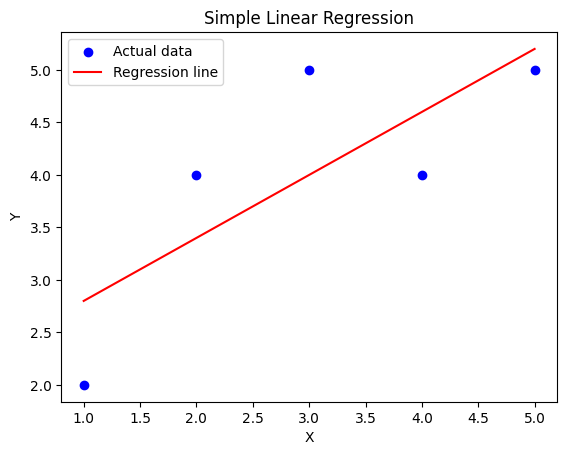

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable
y = np.array([2, 4, 5, 4, 5])                # Dependent variable

# Create model and fit
model = LinearRegression()
model.fit(x, y)

# Predict
y_pred = model.predict(x)

# Print model coefficients
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

# Plot
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


Adjusted r2 score: sometimes when we add very irrevalnt parameters still our r2 score increases or remain same so we use adjusted r2 score.

# Multiple Linear Regression

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [2]:
df=pd.read_csv('/content/pricing_optimization.csv')

In [3]:
df.head()

,Product ID,Store ID,Price,Competitor Prices,Discounts,Sales Volume,Customer Reviews,Return Rate (%),Storage Cost,Elasticity Index
0,9502,13,31.61,56.14,19.68,255,3,13.33,6.72,1.78
1,2068,77,35.51,63.04,16.88,5,3,1.50,8.38,1.67
2,7103,59,6.54,30.61,10.86,184,3,9.44,3.86,2.46
3,5288,19,13.61,15.94,45.28,337,1,15.11,8.80,0.88
4,7212,66,62.68,30.64,33.48,80,3,19.62,9.74,1.00


In [6]:
fig=px.scatter_3d(df,x='Sales Volume',y='Competitor Prices',z='Price')
fig.show()

In [9]:
x=df.drop(['Price','Product ID'],axis=1)
y=df['Price']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Applying PCA to get  most prominent parameters

In [37]:
from sklearn.decomposition import PCA
PCA=PCA(n_components=4)
x_train=PCA.fit_transform(x_train)
x_test=PCA.transform(x_test)


In [38]:
x_train.shape

(8000, 2)

In [39]:
x_train

array([[ 201.2905742 ,   48.09573813],
       [ 209.31133571,   28.50957815],
       [-190.67997564,   24.36975601],
       ...,
       [ -91.63681866,  -35.82608454],
       [  86.41620917,   38.99993015],
       [ 181.33165743,  -17.3941834 ]])

In [40]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [41]:
y_pred=model.predict(x_test)

In [42]:
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('R2 score',r2_score(y_test,y_pred))

MAE 24.20286227098599
MSE 769.0207473489468
R2 score -0.0001194841483107556


In [44]:
# Create 3D Scatter Plot
fig = px.scatter_3d(plot_df, x='Principal Component 1', y='Principal Component 2', z='Price',
                    title='Price vs. Principal Components')
fig.show()

In [46]:
model.coef_

array([-0.00113375, -0.00177749])

In [47]:
model.intercept_

np.float64(52.61665125)

Making own linear regression class


In [1]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Normal Equation: θ = (X^T X)^(-1) X^T y
        theta_best = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

        self.intercept = theta_best[0]
        self.coefficients = theta_best[1:]

    def predict(self, X):
        return X @ self.coefficients + self.intercept

    def score(self, X, y):
        y_pred = self.predict(X)
        u = ((y - y_pred) ** 2).sum()
        v = ((y - y.mean()) ** 2).sum()
        return 1 - u/v


In [2]:
# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([3, 4, 2, 5, 6])

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict
predictions = model.predict(X)
print("Predictions:", predictions)

# R^2 score
print("R^2 Score:", model.score(X, y))


Predictions: [2.6 3.3 4.  4.7 5.4]
R^2 Score: 0.4899999999999999
